In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (8,372 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121752 files and dire

In [1]:
# 구글드라이브 코랩 연동하는 코드
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import folium # 지도 시각화
import pyproj # 좌표변환

import os
import json
import requests

plt.rc('font', family='NanumBarunGothic')
%matplotlib inline

디렉토리 위치 변경

In [3]:
os.chdir("/content/gdrive/MyDrive/강서구/")

In [4]:
os.getcwd()

'/content/gdrive/MyDrive/강서구'

## 데이터 불러오기 및 전처리

In [ ]:
df = pd.read_csv('./서울시 일반음식점 인허가 정보_수정.csv', encoding = 'cp949')

<ipython-input-48-b6acbbeba001>:1: DtypeWarning: Columns (2,8,13,14,27,29,37,38,40,41,42,43,44,47,52,61) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./서울시 일반음식점 인허가 정보_수정.csv', encoding = 'cp949')


In [ ]:
df1 = df.iloc[:,:25]

In [ ]:
df1.columns

Index(['개방자치단체코드', '관리번호', '인허가일자', '인허가취소일자', '영업상태코드', '영업상태명', '상세영업상태코드',
       '상세영업상태명', '폐업일자', '휴업시작일자', '휴업종료일자', '재개업일자', '전화번호', '소재지면적',
       '소재지우편번호', '지번주소', '도로명주소', '도로명우편번호', '사업장명', '최종수정일자', '데이터갱신구분',
       '데이터갱신일자', '업태구분명', '좌표정보(X)', '좌표정보(Y)'],
      dtype='object')

폐업 제외

In [ ]:
df1 = df1[df1.영업상태명 != '폐업']

In [ ]:
set(df1['영업상태명'])

{'영업/정상'}

In [ ]:
df1.describe()

,개방자치단체코드,인허가취소일자,영업상태코드,상세영업상태코드,휴업시작일자,휴업종료일자,재개업일자,도로명우편번호,좌표정보(X),좌표정보(Y)
count,1.251400e+05,0.0,125140.0,125140.0,0.0,0.0,0.0,123284.000000,123512.000000,123512.000000
mean,3.127824e+06,NaN,1.0,1.0,NaN,NaN,NaN,5158.998516,199130.496021,449209.970895
std,7.711003e+04,NaN,0.0,0.0,NaN,NaN,NaN,2115.976949,7118.382737,5224.029545
min,3.000000e+06,NaN,1.0,1.0,NaN,NaN,NaN,1000.000000,180943.793400,436477.114300
25%,3.060000e+06,NaN,1.0,1.0,NaN,NaN,NaN,3460.000000,193170.528325,444983.990250
50%,3.130000e+06,NaN,1.0,1.0,NaN,NaN,NaN,5056.000000,199978.633400,449033.875200
75%,3.200000e+06,NaN,1.0,1.0,NaN,NaN,NaN,6921.000000,204394.719400,452237.303800
max,3.240000e+06,NaN,1.0,1.0,NaN,NaN,NaN,8866.000000,216029.388000,465406.967100


In [ ]:
df1.head()

,개방자치단체코드,관리번호,인허가일자,인허가취소일자,영업상태코드,영업상태명,상세영업상태코드,상세영업상태명,폐업일자,휴업시작일자,...,지번주소,도로명주소,도로명우편번호,사업장명,최종수정일자,데이터갱신구분,데이터갱신일자,업태구분명,좌표정보(X),좌표정보(Y)
0,3010000,3010000-101-2023-00540,2023-11-03,NaN,1,영업/정상,1,영업,NaN,NaN,...,서울특별시 중구 을지로6가 18-137,"서울특별시 중구 장충단로 249-10, 2층 (을지로6가)",4564.0,매취랑 동대문점,2023-11-03 17:09,I,2022-11-01 0:05,한식,200614.4978,451667.7933
1,3230000,3230000-101-2023-00343,2023-05-12,NaN,1,영업/정상,1,영업,NaN,NaN,...,서울특별시 송파구 가락동 84-6,"서울특별시 송파구 송이로20길 12-1, 1층 101호 (가락동)",5712.0,치카바,2023-05-12 14:40,I,2022-12-04 23:04,일식,210536.3795,443748.6844
2,3230000,3230000-101-2023-00220,2023-03-31,NaN,1,영업/정상,1,영업,NaN,NaN,...,서울특별시 송파구 방이동 57 One57빌당,"서울특별시 송파구 올림픽로34길 27-23, One57빌딩 2층 201호 (방이동)",5547.0,오고보,2023-03-31 9:55,I,2022-12-04 0:02,경양식,209835.4199,445884.5368
3,3230000,3230000-101-2023-00222,2023-03-31,NaN,1,영업/정상,1,영업,NaN,NaN,...,서울특별시 송파구 가락동 46-11 문종빌딩,"서울특별시 송파구 오금로36길 64, 문종빌딩 1층 (가락동)",5706.0,또봉이통닭 가락본동점,2023-03-31 11:17,I,2022-12-04 0:02,호프/통닭,210694.9140,444077.2546
4,3230000,3230000-101-2023-00223,2023-03-31,NaN,1,영업/정상,1,영업,NaN,NaN,...,서울특별시 송파구 잠실동 40-1 롯데월드,"서울특별시 송파구 올림픽로 240, 롯데월드 지하1층 (잠실동)",5554.0,파이어벨,2023-03-31 11:49,I,2022-12-04 0:02,기타,208589.3633,445455.9041


지번주소 없는거 제외

In [ ]:
df2 = df1.dropna(subset=['지번주소'])

In [ ]:
df2.isnull().sum()

개방자치단체코드         0
관리번호             0
인허가일자            0
인허가취소일자     125075
영업상태코드           0
영업상태명            0
상세영업상태코드         0
상세영업상태명          0
폐업일자        125075
휴업시작일자      125075
휴업종료일자      125075
재개업일자       125075
전화번호         74073
소재지면적         4101
소재지우편번호          0
지번주소             0
도로명주소         1283
도로명우편번호       1851
사업장명             1
최종수정일자           0
데이터갱신구분          0
데이터갱신일자          0
업태구분명            6
좌표정보(X)       1628
좌표정보(Y)       1628
dtype: int64

In [ ]:
df2.dtypes

개방자치단체코드      int64
관리번호         object
인허가일자        object
인허가취소일자     float64
영업상태코드        int64
영업상태명        object
상세영업상태코드      int64
상세영업상태명      object
폐업일자         object
휴업시작일자      float64
휴업종료일자      float64
재개업일자       float64
전화번호         object
소재지면적        object
소재지우편번호      object
지번주소         object
도로명주소        object
도로명우편번호     float64
사업장명         object
최종수정일자       object
데이터갱신구분      object
데이터갱신일자      object
업태구분명        object
좌표정보(X)     float64
좌표정보(Y)     float64
dtype: object

강서구만 뽑고 싶어요

In [ ]:
def func(x):
  li = str(x).split()[1]
  return li

def func1(x):
  dong = str(x).split()[2]
  return dong

df2['지번주소'] = df2['지번주소'].astype(str)
df2['구'] = df2['지번주소'].map(func)
df2['동'] = df2['지번주소'].map(func1)

# li = []
# num = 0
# for i in df1['지번주소']:
#   idx = str(i).split()
#   print(idx[1], num)
#   num += 1

<ipython-input-53-a99f2a2249ba>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['지번주소'] = df2['지번주소'].astype(str)
<ipython-input-53-a99f2a2249ba>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['구'] = df2['지번주소'].map(func)
<ipython-input-53-a99f2a2249ba>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

In [ ]:
df2.head()

,개방자치단체코드,관리번호,인허가일자,인허가취소일자,영업상태코드,영업상태명,상세영업상태코드,상세영업상태명,폐업일자,휴업시작일자,...,도로명우편번호,사업장명,최종수정일자,데이터갱신구분,데이터갱신일자,업태구분명,좌표정보(X),좌표정보(Y),구,동
0,3010000,3010000-101-2023-00540,2023-11-03,NaN,1,영업/정상,1,영업,NaN,NaN,...,4564.0,매취랑 동대문점,2023-11-03 17:09,I,2022-11-01 0:05,한식,200614.4978,451667.7933,중구,을지로6가
1,3230000,3230000-101-2023-00343,2023-05-12,NaN,1,영업/정상,1,영업,NaN,NaN,...,5712.0,치카바,2023-05-12 14:40,I,2022-12-04 23:04,일식,210536.3795,443748.6844,송파구,가락동
2,3230000,3230000-101-2023-00220,2023-03-31,NaN,1,영업/정상,1,영업,NaN,NaN,...,5547.0,오고보,2023-03-31 9:55,I,2022-12-04 0:02,경양식,209835.4199,445884.5368,송파구,방이동
3,3230000,3230000-101-2023-00222,2023-03-31,NaN,1,영업/정상,1,영업,NaN,NaN,...,5706.0,또봉이통닭 가락본동점,2023-03-31 11:17,I,2022-12-04 0:02,호프/통닭,210694.9140,444077.2546,송파구,가락동
4,3230000,3230000-101-2023-00223,2023-03-31,NaN,1,영업/정상,1,영업,NaN,NaN,...,5554.0,파이어벨,2023-03-31 11:49,I,2022-12-04 0:02,기타,208589.3633,445455.9041,송파구,잠실동


df3에 강서구만

In [ ]:
df3 = df2.loc[df2['구']=='강서구']
df3

,개방자치단체코드,관리번호,인허가일자,인허가취소일자,영업상태코드,영업상태명,상세영업상태코드,상세영업상태명,폐업일자,휴업시작일자,...,도로명우편번호,사업장명,최종수정일자,데이터갱신구분,데이터갱신일자,업태구분명,좌표정보(X),좌표정보(Y),구,동
42,3150000,3150000-101-2023-00201,2023-03-31,NaN,1,영업/정상,1,영업,NaN,NaN,...,7668.0,봉구스 밥버거,2023-03-31 10:39,I,2022-12-04 0:02,한식,187805.3590,449620.6035,강서구,등촌동
43,3150000,3150000-101-2023-00203,2023-03-31,NaN,1,영업/정상,1,영업,NaN,NaN,...,7631.0,모루야,2023-03-31 14:04,I,2022-12-04 0:02,일식,184825.6763,450763.3366,강서구,마곡동
44,3150000,3150000-101-2023-00204,2023-03-31,NaN,1,영업/정상,1,영업,NaN,NaN,...,7766.0,아쿠아리어스 AQuarius,2023-03-31 15:52,I,2022-12-04 0:02,기타,185701.5395,447825.3666,강서구,화곡동
143,3150000,3150000-101-2018-00089,2018-02-19,NaN,1,영업/정상,1,영업,NaN,NaN,...,7803.0,야키토리잔잔 마곡점,2023-03-31 14:56,U,2022-12-04 0:02,정종/대포집/소주방,185554.2994,450891.3124,강서구,마곡동
152,3150000,3150000-101-2017-00465,2017-09-11,NaN,1,영업/정상,1,영업,NaN,NaN,...,7791.0,수성,2023-03-31 15:19,U,2022-12-04 0:02,한식,185827.2394,451790.6995,강서구,마곡동
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502985,3150000,3150000-101-2021-00461,2021-07-08,NaN,1,영업/정상,1,영업,NaN,NaN,...,7806.0,타이반쩜 마곡점,2023-11-20 15:09,U,2022-10-31 22:02,"외국음식전문점(인도,태국등)",184998.7045,450740.5412,강서구,마곡동
503022,3150000,3150000-101-2016-00095,20160324,NaN,1,영업/정상,1,영업,NaN,NaN,...,7582.0,자연채 쌈밥,2022-05-12 16:03,U,2021-12-04 23:04,한식,185932.0354,451560.5369,강서구,등촌동
503068,3150000,3150000-101-2022-00287,20220513,NaN,1,영업/정상,1,영업,NaN,NaN,...,7517.0,마라Kim 마라탕전문점 방화점,2022-06-24 13:59,U,2021-12-05 22:06,중국식,183436.0498,452389.5776,강서구,방화동
503070,3150000,3150000-101-2022-00286,20220513,NaN,1,영업/정상,1,영업,NaN,NaN,...,7803.0,금성회관 마곡점,2022-05-19 10:01,U,2021-12-04 22:01,한식,185365.0000,450789.0000,강서구,마곡동


In [ ]:
set(df3['구'])

{'강서구'}

업종 제한

In [ ]:
name_li = ['뷔페식',
 '패밀리레스트랑',
 '냉면집',
 '까페',
 '기타',
 '통닭(치킨)',
 '패스트푸드',
 '중국식',
 '탕류(보신용)',
 '한식',
 '일식',
 '외국음식전문점(인도,태국등)',
 '경양식',
 '횟집',
 '분식',
 '호프/통닭',
 '김밥(도시락)',
 '식육(숯불구이)']
df4 = df3.loc[df3['업태구분명'].isin(name_li)]

In [ ]:
list(set(df4['업태구분명']))

['통닭(치킨)',
 '탕류(보신용)',
 '분식',
 '일식',
 '기타',
 '한식',
 '식육(숯불구이)',
 '냉면집',
 '뷔페식',
 '김밥(도시락)',
 '호프/통닭',
 '중국식',
 '까페',
 '경양식',
 '횟집',
 '패스트푸드',
 '외국음식전문점(인도,태국등)',
 '패밀리레스트랑']

## 사업장명, 업태구분명, 좌표xy 빼기

In [ ]:
x_train = df4[['지번주소','동','사업장명','업태구분명','좌표정보(X)', '좌표정보(Y)']]

In [ ]:
x_train = x_train.dropna(axis = 0)

In [ ]:
x_train.isnull().sum()

지번주소       0
동          0
사업장명       0
업태구분명      0
좌표정보(X)    0
좌표정보(Y)    0
dtype: int64

좌표계 변환 TM -> WGS84

In [ ]:
x_train['좌표정보(X)'] = pd.to_numeric(x_train['좌표정보(X)'], errors = 'coerce')
x_train['좌표정보(Y)'] = pd.to_numeric(x_train['좌표정보(Y)'], errors = 'coerce')

In [ ]:
def project_array(coord, p1_type, p2_type):
    """
    좌표계 변환 함수
    - coord: x, y 좌표 정보가 담긴 NumPy Array
    - p1_type: 입력 좌표계 정보 ex) epsg:5179
    - p2_type: 출력 좌표계 정보 ex) epsg:4326
    """
    p1 = pyproj.Proj(init=p1_type)
    p2 = pyproj.Proj(init=p2_type)
    fx, fy = pyproj.transform(p1, p2, coord[:, 0], coord[:, 1])
    return np.dstack([fx, fy])[0]

In [ ]:
coord = np.array(x_train[['좌표정보(X)','좌표정보(Y)']])
coord

array([[187805.359 , 449620.6035],
       [184825.6763, 450763.3366],
       [185701.5395, 447825.3666],
       ...,
       [183436.0498, 452389.5776],
       [185365.    , 450789.    ],
       [185736.3222, 447568.9606]])

In [ ]:
# 좌표계 정보 설정
p1_type = "epsg:2097"
p2_type = "epsg:4326"

# project_array() 함수 실행
result = project_array(coord, p1_type, p2_type)
result

/usr/local/lib/python3.10/dist-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/usr/local/lib/python3.10/dist-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
<ipython-input-62-1fe5209744ef>:10: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  fx, fy = pyproj.transform(p1, p2, coord[:, 0], coo

array([[126.85990068,  37.54876817],
       [126.8261583 ,  37.55901962],
       [126.83612856,  37.53256292],
       ...,
       [126.81039403,  37.57364776],
       [126.83226171,  37.5592596 ],
       [126.83652708,  37.53025327]])

In [ ]:
x_train['경도'] = result[:,0]
x_train['위도'] = result[:,1]

In [ ]:
x_train = x_train.reset_index(drop = True)

In [ ]:
x_train.head()

,지번주소,동,사업장명,업태구분명,좌표정보(X),좌표정보(Y),경도,위도
0,서울특별시 강서구 등촌동 510-12 1층,등촌동,봉구스 밥버거,한식,187805.3590,449620.6035,126.859901,37.548768
1,서울특별시 강서구 마곡동 799-3 문영 퀸즈파크12차,마곡동,모루야,일식,184825.6763,450763.3366,126.826158,37.559020
2,서울특별시 강서구 화곡동 359-86,화곡동,아쿠아리어스 AQuarius,기타,185701.5395,447825.3666,126.836129,37.532563
3,서울특별시 강서구 마곡동 776-2 외 1필지 마곡센트럴대방디엠시티오피스텔 (지상 ...,마곡동,수성,한식,185827.2394,451790.6995,126.837474,37.568292
4,"서울특별시 강서구 마곡동 799-4 마곡지웰타워 114,115호",마곡동,부대냉삼 이백집,한식,184865.6882,450758.1659,126.826611,37.558974


csv로 전처리한거 저장~

In [ ]:
# x_train.to_csv('./강서구_음식점_정보.csv')

## csv로부터 재시작합시다

In [6]:
gang = pd.read_csv('./강서구_음식점_정보.csv')

In [ ]:
gang.head()

,Unnamed: 0,지번주소,동,사업장명,업태구분명,좌표정보(X),좌표정보(Y),경도,위도
0,0,서울특별시 강서구 등촌동 510-12 1층,등촌동,봉구스 밥버거,한식,187805.3590,449620.6035,126.859901,37.548768
1,1,서울특별시 강서구 마곡동 799-3 문영 퀸즈파크12차,마곡동,모루야,일식,184825.6763,450763.3366,126.826158,37.559020
2,2,서울특별시 강서구 화곡동 359-86,화곡동,아쿠아리어스 AQuarius,기타,185701.5395,447825.3666,126.836129,37.532563
3,3,서울특별시 강서구 마곡동 776-2 외 1필지 마곡센트럴대방디엠시티오피스텔 (지상 ...,마곡동,수성,한식,185827.2394,451790.6995,126.837474,37.568292
4,4,"서울특별시 강서구 마곡동 799-4 마곡지웰타워 114,115호",마곡동,부대냉삼 이백집,한식,184865.6882,450758.1659,126.826611,37.558974


In [ ]:
latitude = gang['위도'] # y좌표
longitude = gang['경도'] # x좌표

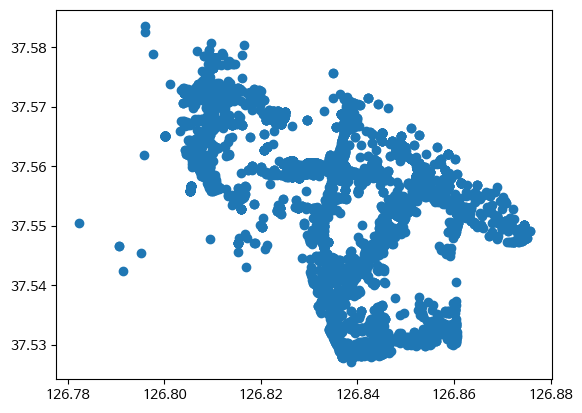

In [ ]:
plt.scatter(longitude, latitude)
plt.show()

In [ ]:
m = folium.Map(location = [gang['위도'].mean(), gang['경도'].mean()], zoom_start = 14)

for _, row in gang.iterrows():
  lat = row['위도']
  lon = row['경도']
  folium.Circle(location = [lat, lon], radius = 10).add_to(m)

m

Output hidden; open in https://colab.research.google.com to view.

## 군집분석 시작 k-means

In [5]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

### elbow

In [7]:
arr = []
k_range = range(2,15)
x_train = gang[['경도','위도']]

for k in k_range:

  Kmeans = KMeans(n_clusters = k, random_state = 200)
  Kmeans.fit(x_train)
  inter = Kmeans.inertia_

  print('k : ', k, 'intertia : ', inter)

  arr.append(inter)

arr = np.array(arr)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k :  2 intertia :  1.092136848481997


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k :  3 intertia :  0.7304808158342144


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k :  4 intertia :  0.4541788342668747


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k :  5 intertia :  0.3571634174381345


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k :  6 intertia :  0.2874658560482252


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k :  7 intertia :  0.24259228274717898


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k :  8 intertia :  0.20135472457369463


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k :  9 intertia :  0.1696010933975115


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k :  10 intertia :  0.14689015612179895


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k :  11 intertia :  0.13200630044664008


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k :  12 intertia :  0.11895143030749096


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k :  13 intertia :  0.10992763264849628


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k :  14 intertia :  0.10019795677508607


k = 4에서 급격히 꺾이는걸 보니 elbow 기법상 최적 군집 개수는 4개

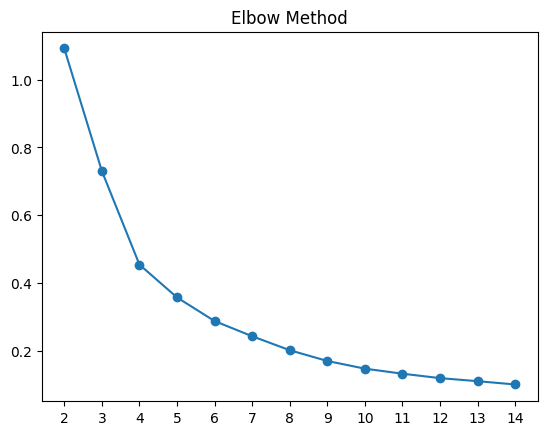

In [8]:
plt.plot(k_range, arr, '-o')
plt.title('Elbow Method')
plt.xticks(k_range)
plt.show()

실루엣

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k :  2 score :  0.46043079225592703


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k :  3 score :  0.43635194347806805


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k :  4 score :  0.4777903818203699


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k :  5 score :  0.4741531058006965


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k :  6 score :  0.46831016212504273


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k :  7 score :  0.44529704158030226


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k :  8 score :  0.4609579283439461


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k :  9 score :  0.4576381408028117


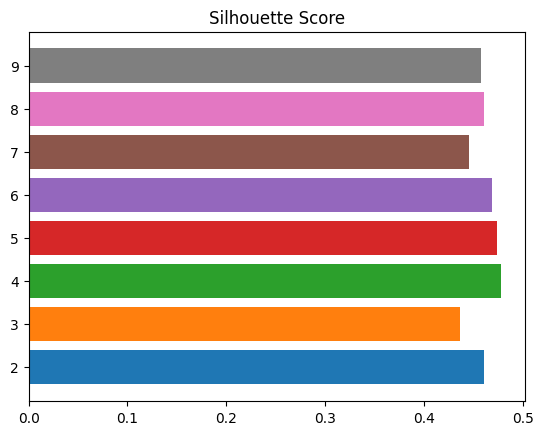

best_n :  4 best_score :  0.4777903818203699


In [9]:
k_range = range(2,10)

best_n = -1
best_silhouette_score = -1

for k in k_range:

  kmeans = KMeans(n_clusters = k, random_state = 200)
  kmeans.fit(x_train)
  clusters = kmeans.predict(x_train)

  score = silhouette_score(x_train, clusters)
  print('k : ', k, 'score : ', score)

  _=plt.barh(k, score)

  if score > best_silhouette_score:
    best_n = k
    best_silhouette_score = score

plt.title('Silhouette Score')
plt.show()
print('best_n : ', best_n, 'best_score : ', best_silhouette_score)

In [ ]:
model = KMeans(n_clusters = 4, random_state = 200)
model.fit(x_train)
centers = model.cluster_centers_
pred = model.predict(x_train)

center_df = pd.DataFrame(centers)
print(center_df)
print(pred[:10])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


            0          1
0  126.854818  37.554084
1  126.831976  37.560389
2  126.809422  37.566499
3  126.843072  37.536080
[0 1 3 1 1 1 1 3 1 1]


In [ ]:
clust_df = x_train.copy()
clust_df['clust'] = pred
clust_df.head()

,경도,위도,clust
0,126.859901,37.548768,0
1,126.826158,37.559020,1
2,126.836129,37.532563,3
3,126.837474,37.568292,1
4,126.826611,37.558974,1


In [ ]:
# clust_df.to_csv('./강서구_음식점_군집.csv')

## 군집

In [ ]:
clust_df = pd.read_csv('/content/gdrive/MyDrive/강서구/강서구_음식점_군집.csv')

In [ ]:
clust_df.head()

,Unnamed: 0,경도,위도,clust
0,0,126.859901,37.548768,0
1,1,126.826158,37.559020,1
2,2,126.836129,37.532563,3
3,3,126.837474,37.568292,1
4,4,126.826611,37.558974,1


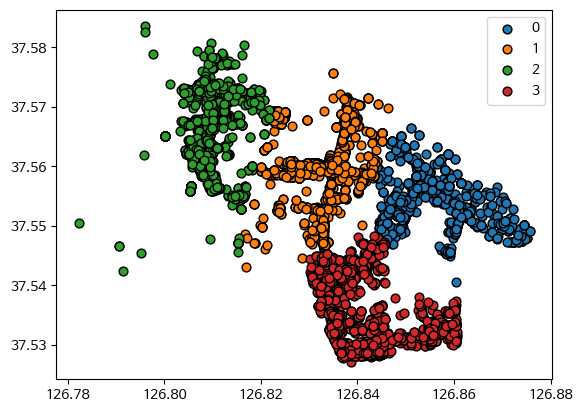

In [ ]:
col_li = []

labels = np.unique(clust_df['clust'])

for label in labels:
  clust_v = clust_df[clust_df['clust'] == label]
  plt.scatter(clust_v['경도'], clust_v['위도'], label = label, s = 40, edgecolor = 'k')
plt.legend()
plt.show()

In [ ]:
# from config import vworld_key

vworld_key="4034FAEE-737C-3416-A496-E4E7FFA4D26E"

# 배경지도 타일 설정하기
layer = "Base"
tileType = "png"
tiles = f"http://api.vworld.kr/req/wmts/1.0.0/{vworld_key}/{layer}/{{z}}/{{y}}/{{x}}.{tileType}"
attr = "Vworld"

m = folium.Map(location = [clust_df['위도'].mean(), clust_df['경도'].mean()], zoom_start = 14)

folium.TileLayer(tiles = tiles, attr = attr, overlay = True, control = True).add_to(m)

for _, row in clust_df.iterrows():
  lat = row['위도']
  lon = row['경도']
  if row['clust'] == 0:
    folium.Circle(location = [lat, lon], radius = 10, color = 'blue').add_to(m)
  elif row['clust'] == 1:
    folium.Circle(location = [lat, lon], radius = 10, color = 'orange').add_to(m)
  elif row['clust'] == 2:
    folium.Circle(location = [lat, lon], radius = 10, color = 'green').add_to(m)
  else:
    folium.Circle(location = [lat, lon], radius = 10, color = 'red').add_to(m)

m

Output hidden; open in https://colab.research.google.com to view.

각 군집 좌표값 평균 위치 시각화

In [ ]:
df0 = clust_df[clust_df['clust'] == 0]
df1 = clust_df[clust_df['clust'] == 1]
df2 = clust_df[clust_df['clust'] == 2]
df3 = clust_df[clust_df['clust'] == 3]

In [ ]:
df0_lat = df0['위도'].mean()
df0_lon = df0['경도'].mean()

df1_lat = df1['위도'].mean()
df1_lon = df1['경도'].mean()

df2_lat = df2['위도'].mean()
df2_lon = df2['경도'].mean()

df3_lat = df3['위도'].mean()
df3_lon = df3['경도'].mean()

df_mean = pd.DataFrame([[df0_lat, df0_lon, 0],
                       [df1_lat, df1_lon, 1],
                       [df2_lat, df2_lon, 2],
                       [df3_lat, df3_lon, 3]], columns = ['위도', '경도', 'clust'])

In [ ]:
m = folium.Map(location = [clust_df['위도'].mean(), clust_df['경도'].mean()], zoom_start = 14)

folium.TileLayer(tiles = tiles, attr = attr, overlay = True, control = True).add_to(m)

for _, row in df_mean.iterrows():
  lat = row['위도']
  lon = row['경도']
  if row['clust'] == 0:
    folium.Circle(location = [lat, lon], radius = 50, color = 'blue').add_to(m)
  elif row['clust'] == 1:
    folium.Circle(location = [lat, lon], radius = 50, color = 'orange').add_to(m)
  elif row['clust'] == 2:
    folium.Circle(location = [lat, lon], radius = 50, color = 'green').add_to(m)
  else:
    folium.Circle(location = [lat, lon], radius = 50, color = 'red').add_to(m)

m

## 주차장 크롤링 (위 평균값 주변)

https://health-coding.tistory.com/34

In [ ]:
class KakaoLocalAPI:
    """
    Kakao Local API 컨트롤러
    """
    def __init__(self, rest_api_key):
        """
        Rest API키 초기화 및 기능 별 URL 설정
        """

        # REST API 키 설정
        self.rest_api_key = rest_api_key
        self.headers = {"Authorization": "KakaoAK {}".format(rest_api_key)}

        # 서비스 별 URL 설정

        # 01 주소 검색
        self.URL_01 = "https://dapi.kakao.com/v2/local/search/address.json"
        # 02 좌표-행정구역정보 변환
        self.URL_02 = "https://dapi.kakao.com/v2/local/geo/coord2regioncode.json"
        # 03 좌표-주소 변환
        self.URL_03 = "https://dapi.kakao.com/v2/local/geo/coord2address.json"
        # 04 좌표계 변환
        self.URL_04 = "https://dapi.kakao.com/v2/local/geo/transcoord.json"
        # 05 키워드 검색
        self.URL_05 = "https://dapi.kakao.com/v2/local/search/keyword.json"
        # 06 카테고리 검색
        self.URL_06 = "https://dapi.kakao.com/v2/local/search/category.json"

    def search_address(self, query, analyze_type=None, page=None, size=None):
        """
        01 주소 검색
        """
        params = {"query": f"{query}"}

        if analyze_type != None:
            params["analyze_type"] = f"{analyze_type}"

        if page != None:
            params['page'] = f"{page}"

        if size != None:
            params['size'] = f"{size}"

        res = requests.get(self.URL_01, headers=self.headers, params=params)
        document = json.loads(res.text)

        return document

    def geo_coord2regioncode(self, x, y, input_coord=None, output_coord=None):
        """
        02 좌표-행정구역정보 변환
        """
        params = {"x": f"{x}",
                  "y": f"{y}"}

        if input_coord != None:
            params['input_coord'] = f"{input_coord}"

        if output_coord != None:
            params['output_coord'] = f"{output_coord}"

        res = requests.get(self.URL_02, headers=self.headers, params=params)
        document = json.loads(res.text)

        return document

    def geo_coord2address(self, x, y, input_coord=None):
        """
        03 좌표-주소 변환
        """
        params = {"x": f"{x}",
                  "y": f"{y}"}

        if input_coord != None:
            params['input_coord'] = f"{input_coord}"

        res = requests.get(self.URL_03, headers=self.headers, params=params)
        document = json.loads(res.text)

        return document

    def geo_transcoord(self, x, y, output_coord, input_coord=None):
        """
        04 좌표계 변환
        """
        params = {"x": f"{x}",
                  "y": f"{y}",
                  "output_coord": f"{output_coord}"}

        if input_coord != None:
            params['input_coord'] = f"{input_coord}"

        res = requests.get(self.URL_04, headers=self.headers, params=params)
        document = json.loads(res.text)

        return document

    def search_keyword(self,query,category_group_code=None,x=None,y=None,radius=None,rect=None,page=None,size=None,sort=None):
        """
        05 키워드 검색
        """
        params = {"query": f"{query}"}

        if category_group_code != None:
            params['category_group_code'] = f"{category_group_code}"
        if x != None:
            params['x'] = f"{x}"
        if y != None:
            params['y'] = f"{y}"
        if radius != None:
            params['radius'] = f"{radius}"
        if rect != None:
            params['rect'] = f"{rect}"
        if page != None:
            params['page'] = f"{page}"
        if size != None:
            params['size'] = f"{params}"
        if sort != None:
            params['sort'] = f"{sort}"

        res = requests.get(self.URL_05, headers=self.headers, params=params)
        document = json.loads(res.text)

        return document

    def search_category(self, category_group_code, x, y, radius=None, rect=None, page=None, size=None, sort=None):
        """
        06 카테고리 검색
        """
        params = {'category_group_code': f"{category_group_code}",
                  'x': f"{x}",
                  'y': f"{y}"}

        if radius != None:
            params['radius'] = f"{radius}"
        if rect != None:
            params['rect'] = f"{rect}"
        if page != None:
            params['page'] = f"{page}"
        if size != None:
            params['size'] = f"{size}"
        if sort != None:
            params['sort'] = f"{sort}"

        res = requests.get(self.URL_06, headers=self.headers, params=params)
        document = json.loads(res.text)

        return document

In [ ]:
rest_api_key = "2ae7531139f43e40574b5283a9439082" # 본인 카카오 rest_api 키

kakao = KakaoLocalAPI(rest_api_key)

In [ ]:
clust_df['경도'].mean()

126.83573512606743

In [ ]:
# '''
# category_group_code
# MT1 대형마트
# CS2 편의점
# PS3 어린이집, 유치원
# SC4 학교
# AC5 학원
# PK6 주차장
# OL7 주유소, 충전소
# SW8 지하철역
# BK9 은행
# CT1 문화시설
# AG2 중개업소
# PO3 공공기관
# AT4 관광명소
# AD5 숙박
# FD6 음식점
# CE7 카페
# HP8 병원
# PM9 약국

# 'address_name', 'place_name', 'x', 'y'
category_group_code = "PK6"
result = []
for _, row in df_mean.iterrows():
  x = row['경도']
  y = row['위도']
  radius = 20000
  result_6 = kakao.search_category(category_group_code, x, y, radius)
  for i in result_6['documents']:
    result.append([i['address_name'],i['place_name'],i['x'],i['y']])

In [ ]:
park_df = pd.DataFrame(result, columns = ['주소', '이름', '경도', '위도'])

In [ ]:
park_df.head()

,주소,이름,경도,위도
0,서울 강서구 화곡동 1103-6,화곡6-1 공영주차장,126.848645770138,37.5530213584868
1,서울 강서구 화곡동 1109-1,화곡6동 방죽길 노상공영주차장,126.852858478481,37.5544754867841
2,서울 강서구 등촌동 639-11,홈플러스 강서점 주차장,126.85501470021417,37.5584101039439
3,서울 양천구 목동 614-3,목동깨비시장 공동주차장,126.863684553801,37.5482283504022
4,서울 강서구 화곡동 980-16,강서구청 주차장,126.84982274909,37.550757753903


In [ ]:
# park_df.to_csv('./강서구_군집주변주차장.csv')

공원

In [ ]:
query = "공원"

result = []
for _, row in df_mean.iterrows():
  x = row['경도']
  y = row['위도']
  radius = 20000
  result_5 = kakao.search_keyword(query, x = x, y = y, radius= radius)
  # print(result_5)
  for i in result_5['documents']:
    result.append([i['address_name'],i['place_name'],i['x'],i['y']])

In [ ]:
park_df2 = pd.DataFrame(result, columns = ['주소', '이름', '경도', '위도'])

In [ ]:
# park_df2.to_csv('./강서구_군집주변공원.csv')

## 주차장까지 지도 시각화 Lets go

In [ ]:
park_df = pd.read_csv('강서구_군집주변주차장.csv')
park_df2 = pd.read_csv('강서구_군집주변공원.csv')

In [ ]:
park_df.head()

,Unnamed: 0,주소,이름,경도,위도
0,0,서울 강서구 화곡동 1103-6,화곡6-1 공영주차장,126.848646,37.553021
1,1,서울 강서구 화곡동 1109-1,화곡6동 방죽길 노상공영주차장,126.852858,37.554475
2,2,서울 강서구 등촌동 639-11,홈플러스 강서점 주차장,126.855015,37.558410
3,3,서울 양천구 목동 614-3,목동깨비시장 공동주차장,126.863685,37.548228
4,4,서울 강서구 화곡동 980-16,강서구청 주차장,126.849823,37.550758


In [ ]:
park_df2.head()

,Unnamed: 0,주소,이름,경도,위도
0,0,서울 강서구 내발산동 산 60-1,우장산 공원,126.845439,37.554470
1,1,서울 강서구 등촌동 706,서낭당 근린공원,126.850016,37.558584
2,2,서울 강서구 등촌동 641-5,등마루공원,126.857405,37.555995
3,3,서울 강서구 화곡동 1109,연지어린이공원,126.853272,37.554698
4,4,서울 강서구 화곡동 산 60-1,우장근린공원,126.845126,37.550386


In [ ]:
m = folium.Map(location = [clust_df['위도'].mean(), clust_df['경도'].mean()], zoom_start = 14)

folium.TileLayer(tiles = tiles, attr = attr, overlay = True, control = True).add_to(m)

for _, row in df_mean.iterrows():
  lat = row['위도']
  lon = row['경도']
  if row['clust'] == 0:
    folium.Circle(location = [lat, lon], radius = 1000, color = 'blue').add_to(m)
  elif row['clust'] == 1:
    folium.Circle(location = [lat, lon], radius = 1000, color = 'orange').add_to(m)
  elif row['clust'] == 2:
    folium.Circle(location = [lat, lon], radius = 1000, color = 'green').add_to(m)
  else:
    folium.Circle(location = [lat, lon], radius = 1000, color = 'red').add_to(m)
# 주차장
for _,row in park_df.iterrows():
  img = 'parking.png'
  icon = folium.CustomIcon(img, icon_size=(30, 30))
  lat = row['위도']
  lon = row['경도']
  folium.Marker(location = [lat, lon], icon = icon).add_to(m)
# 공원
for _,row in park_df2.iterrows():
  img2 = 'park.png'
  icon = folium.CustomIcon(img2, icon_size=(30, 30))
  lat = row['위도']
  lon = row['경도']
  folium.Marker(location = [lat, lon], icon = icon).add_to(m)

m

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
m = folium.Map(location = [clust_df['위도'].mean(), clust_df['경도'].mean()], zoom_start = 14, tiles = tiles, attr = attr)

folium.TileLayer(tiles = tiles, attr = attr, overlay = True, control = True).add_to(m)

for _, row in clust_df.iterrows():
  lat = row['위도']
  lon = row['경도']
  folium.Circle(location = [lat, lon], radius = 10, color = 'plum').add_to(m)

for _, row in df_mean.iterrows():
  lat = row['위도']
  lon = row['경도']
  if row['clust'] == 0:
    folium.Circle(location = [lat, lon], radius = 50, color = 'blue').add_to(m)
  elif row['clust'] == 1:
    folium.Circle(location = [lat, lon], radius = 50, color = 'orange').add_to(m)
  elif row['clust'] == 2:
    folium.Circle(location = [lat, lon], radius = 50, color = 'green').add_to(m)
  else:
    folium.Circle(location = [lat, lon], radius = 50, color = 'red').add_to(m)

for _,row in park_df.iterrows():
  lat = row['위도']
  lon = row['경도']
  folium.Circle(location = [lat, lon], radius = 20).add_to(m)

m

Output hidden; open in https://colab.research.google.com to view.

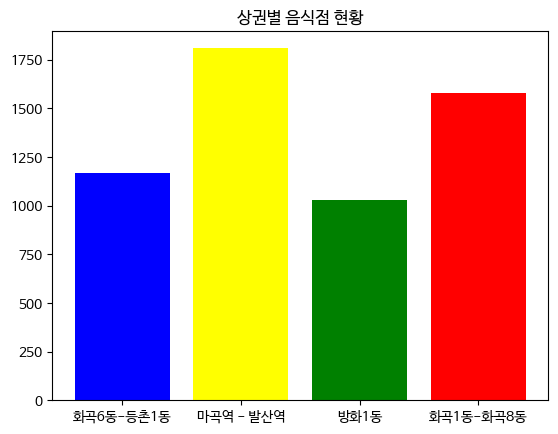

In [ ]:
count_df = clust_df.value_counts('clust').to_frame().sort_index().reset_index(drop = True)

plt.bar(count_df.index, count_df['count'], color = ['b','yellow','g','r'])
plt.xticks(count_df.index, ['화곡6동-등촌1동', '마곡역 - 발산역', '방화1동','화곡1동-화곡8동'])
plt.title('상권별 음식점 현황')
plt.show()

In [ ]:
count_gang = gang.value_counts('동').to_frame().reset_index()
count_gang

,동,count
0,화곡동,2059
1,마곡동,1140
2,등촌동,675
3,방화동,648
4,내발산동,324
5,공항동,283
6,염창동,214
7,가양동,201
8,외발산동,31
9,개화동,3


In [ ]:
import pandas as pd

# 데이터 프레임 생성

df = count_gang

# '내발산동'과 '외발산동'의 값을 합하여 '발산동 합' 열 생성
df.loc[df['동'].isin(['내발산동', '외발산동']), '동'] = '발산동'
df = df.groupby('동', as_index=False).sum().sort_values(by='count', ascending=False).reset_index(drop = True)

df

,동,count
0,화곡동,2059
1,마곡동,1140
2,등촌동,675
3,방화동,648
4,발산동,355
5,공항동,283
6,염창동,214
7,가양동,201
8,개화동,3
9,오곡동,3


In [ ]:
# df.to_csv('./강서구_동별_음식점개수.csv')

In [ ]:
human = pd.read_excel('/content/gdrive/MyDrive/강서구/서울특별시_읍면동_별_5세별_주민등록인구_2011년__20240408193339.xlsx')
human = human[['행정구역(동읍면)별', '총인구수 (명)']]
human

,행정구역(동읍면)별,총인구수 (명)
0,강서구,561386
1,염창동,41304
2,등촌제1동,24980
3,등촌제2동,19233
4,등촌제3동,29318
5,화곡제1동,50645
6,화곡제2동,17022
7,화곡제3동,21053
8,화곡제4동,19602
9,화곡본동,32898


In [ ]:
sum1 = human[human['행정구역(동읍면)별'].str.contains('등촌')]['총인구수 (명)'].sum()
human.loc[21] = ['등촌동', sum1]

sum1 = human[human['행정구역(동읍면)별'].str.contains('화곡')]['총인구수 (명)'].sum()
human.loc[22] = ['화곡동', sum1]

sum1 = human[human['행정구역(동읍면)별'].str.contains('가양')]['총인구수 (명)'].sum()
human.loc[23] = ['가양동', sum1]

sum1 = human[human['행정구역(동읍면)별'].str.contains('발산')]['총인구수 (명)'].sum()
human.loc[24] = ['발산동', sum1]

sum1 = human[human['행정구역(동읍면)별'].str.contains('방화')]['총인구수 (명)'].sum()
human.loc[25] = ['방화동', sum1]

human = human.iloc[[1,16,17,21,22,23,24,25]].reset_index(drop = True)

human

,행정구역(동읍면)별,총인구수 (명)
0,염창동,41304
1,우장산동,43638
2,공항동,29413
3,등촌동,73531
4,화곡동,190501
5,가양동,61140
6,발산동,35508
7,방화동,86351


In [ ]:
human.columns = ['동', '인구수']
merge_df = pd.merge(df, human, on = '동', how = 'outer')
merge_df

,동,count,인구수
0,화곡동,2059.0,190501.0
1,마곡동,1140.0,NaN
2,등촌동,675.0,73531.0
3,방화동,648.0,86351.0
4,발산동,355.0,35508.0
5,공항동,283.0,NaN
6,염창동,214.0,NaN
7,가양동,201.0,61140.0
8,개화동,3.0,NaN
9,오곡동,3.0,NaN
